# EDA notebook

## Importing the Data

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import data_preparation as dp
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

bom_cleaned = pd.read_csv("../data/bom.movie_gross.csv.gz")
conn = sqlite3.connect("../data/im.db")

In [185]:
imdb_basics = pd.read_csv("../data/imdb_basics_financials.csv")
merged_financials = pd.read_csv("../data/merged_financials.csv")

In [3]:
bom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
for table_name in imdb_tables:
    df = pd.read_sql(f"SELECT * from {table_name[0]}", conn)
    print(f"Table: {table_name[0]}")
    print(df.info(),"\n")

NameError: name 'imdb_tables' is not defined

## GENRE VS RATING (James)

In [13]:
genre_vs_rating=pd.read_sql('''
SELECT b.genres, avg(r.averagerating) as average_rating
FROM movie_basics b
	JOIN movie_ratings r
	USING (movie_id)
GROUP BY genres;'''
, conn)
genre_vs_rating.head(20)
genre_vs_rating.iloc[:,:1].head()

,genres
0,None
1,Action
2,"Action,Adult,Comedy"
3,"Action,Adventure"
4,"Action,Adventure,Animation"


## GENRE VS GROSS (James)

In [5]:
genre=pd.read_sql('''
SELECT primary_title as 'title', genres
FROM movie_basics
;'''
, conn)
genre

,title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...
146139,Kuambil Lagi Hatiku,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,Dankyavar Danka,Comedy
146142,6 Gunn,None


In [7]:
df = bom_cleaned.merge(genre,how='inner',on='title')

,title,studio,domestic_gross,foreign_gross,year,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,NaN,2018,"Comedy,Romance"
3362,Souvenir,Strand,11400.0,NaN,2018,Documentary
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,"Crime,Drama,Thriller"
3364,The Quake,Magn.,6200.0,NaN,2018,"Action,Drama,Thriller"


## GENRE VS GROSS & BUDGET (James)

## BUDGET VS GROSS (me)

In [8]:
imdb_basics

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y
0,0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
147924,147924,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN
147925,147925,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN
147926,147926,tt9916706,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN
147927,147927,tt9916730,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
imdb_basics.drop('title_merge_x', axis = 1, inplace = True)

In [13]:
#making new table from imdb basics of only ones with a production budget
budget_vs_gross_df = imdb_basics[(imdb_basics['production_budget']!= 0) & (imdb_basics['production_budget'].notnull() == True)]

In [14]:
#making a net loss/gain col
budget_vs_gross_df['budget_vs_gross'] = budget_vs_gross_df['worldwide_gross'] - budget_vs_gross_df['production_budget']

<ipython-input-14-38c0e05c68dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_vs_gross_df['budget_vs_gross'] = budget_vs_gross_df['worldwide_gross'] - budget_vs_gross_df['production_budget']


In [15]:
budget_vs_gross_df

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
20,20,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31 00:00:00,Foodfight!,45000000.0,0.0,73706.0,foodfight!,-44926294.0
33,33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",1995-08-18 00:00:00,Mortal Kombat,20000000.0,70433227.0,122133227.0,mortalkombat,102133227.0
40,40,tt0326592,The Overnight,2010,88.0,NaN,2015-06-19 00:00:00,The Overnight,200000.0,1109808.0,1165996.0,theovernight,965996.0
49,49,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2013-03-22 00:00:00,On the Road,25000000.0,720828.0,9313302.0,ontheroad,-15686698.0
56,56,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25 00:00:00,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,thesecretlifeofwaltermitty,96861183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147627,147627,tt9877596,Trapped,2016,NaN,NaN,2002-09-20 00:00:00,Trapped,30000000.0,6916869.0,6916869.0,trapped,-23083131.0
147721,147721,tt9889072,The Promise,2017,NaN,Drama,2017-04-21 00:00:00,The Promise,90000000.0,8224288.0,10551417.0,thepromise,-79448583.0
147770,147770,tt9893078,Sublime,2019,NaN,Documentary,2007-03-13 00:00:00,Sublime,1800000.0,0.0,0.0,sublime,-1800000.0
147809,147809,tt9899880,Columbus,2018,85.0,Comedy,2017-08-04 00:00:00,Columbus,700000.0,1017107.0,1110511.0,columbus,410511.0


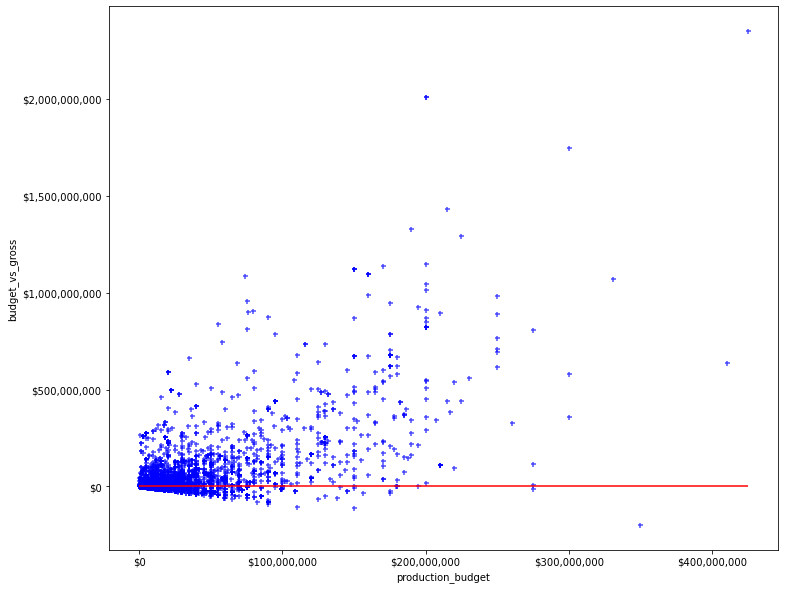

In [28]:
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(x = budget_vs_gross_df['production_budget'], y = budget_vs_gross_df['budget_vs_gross'], marker = '+', 
            scatter_kws={"color":"blue","alpha":0.7,"s":25}, fit_reg = False)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.hlines(y = 0, xmin = budget_vs_gross_df['production_budget'].min(), xmax = budget_vs_gross_df['production_budget'].max(),
         color = 'red')

- Doesn't tell too much, shows movies with high production can flop
- if anything will show % of over vs under net gross.
- is it fair to say above point is 'chance' of failing? (making none or lose $)

In [177]:
net_positive[net_positive['movie'] == 'Avatar']

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
17740,17740,tt1775309,Avatar,2011,93.0,Horror,2009-12-18 00:00:00,Avatar,425000000.0,760507625.0,2.776345e+09,avatar,2.351345e+09


In [30]:
net_positive = budget_vs_gross_df[budget_vs_gross_df['budget_vs_gross'] > 0]
net_negative = budget_vs_gross_df[budget_vs_gross_df['budget_vs_gross'] < 0]

In [53]:
chance_of_loss = len(net_negative)/len(budget_vs_gross_df) * 100
chance_of_loss

40.89121887287025

In [43]:
production_mean = budget_vs_gross_df['production_budget'].mean()
production_mean

32608184.522411533

In [44]:
production_std = budget_vs_gross_df['production_budget'].std()
production_std

44959164.06216073

- will take values 2 std away from mean (from 0 - 95% of data)

In [46]:
production_max = production_mean + (2*production_std)
production_max

122526512.64673299

In [48]:
std2_away = budget_vs_gross_df[budget_vs_gross_df['production_budget'] < production_max]
std2_away

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
20,20,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31 00:00:00,Foodfight!,45000000.0,0.0,73706.0,foodfight!,-44926294.0
33,33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",1995-08-18 00:00:00,Mortal Kombat,20000000.0,70433227.0,122133227.0,mortalkombat,102133227.0
40,40,tt0326592,The Overnight,2010,88.0,NaN,2015-06-19 00:00:00,The Overnight,200000.0,1109808.0,1165996.0,theovernight,965996.0
49,49,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2013-03-22 00:00:00,On the Road,25000000.0,720828.0,9313302.0,ontheroad,-15686698.0
56,56,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25 00:00:00,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,thesecretlifeofwaltermitty,96861183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147627,147627,tt9877596,Trapped,2016,NaN,NaN,2002-09-20 00:00:00,Trapped,30000000.0,6916869.0,6916869.0,trapped,-23083131.0
147721,147721,tt9889072,The Promise,2017,NaN,Drama,2017-04-21 00:00:00,The Promise,90000000.0,8224288.0,10551417.0,thepromise,-79448583.0
147770,147770,tt9893078,Sublime,2019,NaN,Documentary,2007-03-13 00:00:00,Sublime,1800000.0,0.0,0.0,sublime,-1800000.0
147809,147809,tt9899880,Columbus,2018,85.0,Comedy,2017-08-04 00:00:00,Columbus,700000.0,1017107.0,1110511.0,columbus,410511.0


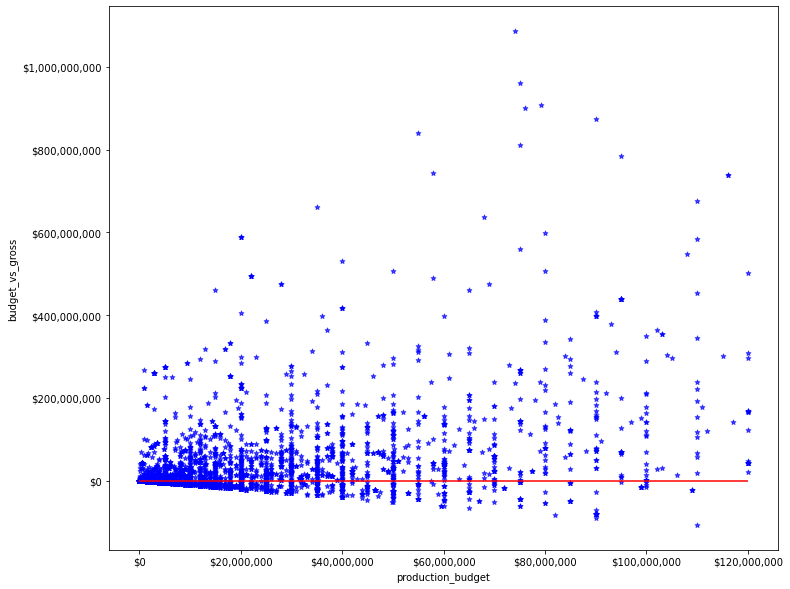

In [51]:
#redoing plot to remove outliers
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(x = std2_away['production_budget'], y = std2_away['budget_vs_gross'], marker = '*', 
            scatter_kws={"color":"blue","alpha":0.7,"s":25}, fit_reg = False)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.hlines(y = 0, xmin = std2_away['production_budget'].min(), xmax = std2_away['production_budget'].max(),
         color = 'red')

In [54]:
net_positive_2away = std2_away[std2_away['budget_vs_gross'] > 0]
net_negative_2away = std2_away[std2_away['budget_vs_gross'] < 0]
chance_of_loss_2away = len(net_negative_2away)/len(std2_away) * 100
chance_of_loss_2away

43.27272727272727

- I think the only conclusion with the chance of loss is
   - if you spend less than 123,000, you have a 43% are unprofitable
   - if you spend more, the profitable are now about 40%
- this conclusion is pretty weak imo. But separating into 2 dfs of net loss and net gain may help in the next EDA's
- Will continue with the net_pos/net_neg withouth the 2std calculation

## WRITER VS GROSS (me)

In [81]:
q0 = """
SELECT *
FROM writers
;
"""
writer_df = pd.read_sql(q0, conn)

In [82]:
q1 = """
SELECT person_id, primary_name, death_year
FROM persons
;
"""
person_df = pd.read_sql(q1, conn)

In [83]:
writer_df.duplicated().value_counts()

False    178352
True      77521
dtype: int64

In [59]:
writer_df[writer_df.duplicated() == True]

,movie_id,person_id
7,tt0878654,nm0284943
8,tt0878654,nm0284943
47,tt10140002,nm0104200
77,tt1323592,nm2598931
79,tt1323592,nm0132843
...,...,...
255818,tt8856070,nm2532982
255820,tt8856070,nm2537532
255822,tt8865986,nm6676529
255824,tt8865986,nm10058226


I think we can straight up merge on movie id to associate the writers.

May need to do left merge with writers on left? Since multiple writers can work on same movie

Then drop cols with production budget at 0 or null

In [84]:
temp_pos = writer_df.merge(
    net_positive, 
    left_on='movie_id',
    right_on = 'movie_id',
    how = 'left')


In [90]:
temp_pos

,movie_id,person_id,Unnamed: 0,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross,primary_name,death_year
0,tt1126618,nm0112459,5818.0,Morning Glory,2010.0,107.0,"Comedy,Drama,Romance",2010-11-10 00:00:00,Morning Glory,40000000.0,31011732.0,59795070.0,morningglory,19795070.0,Aline Brosh McKenna,NaN
1,tt1411704,nm0666791,7755.0,Hop,2011.0,95.0,"Adventure,Animation,Comedy",2011-04-01 00:00:00,Hop,63000000.0,108085305.0,188657593.0,hop,125657593.0,Cinco Paul,NaN
2,tt1411704,nm0202425,7755.0,Hop,2011.0,95.0,"Adventure,Animation,Comedy",2011-04-01 00:00:00,Hop,63000000.0,108085305.0,188657593.0,hop,125657593.0,Ken Daurio,NaN
3,tt1411704,nm0528244,7755.0,Hop,2011.0,95.0,"Adventure,Animation,Comedy",2011-04-01 00:00:00,Hop,63000000.0,108085305.0,188657593.0,hop,125657593.0,Brian Lynch,NaN
4,tt1564585,nm1634030,10063.0,Skyline,2010.0,92.0,"Action,Sci-Fi,Thriller",2010-11-12 00:00:00,Skyline,10000000.0,21416355.0,68264973.0,skyline,58264973.0,Joshua Cordes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,tt7634968,nm0326092,127036.0,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0,whatmenwant,49911903.0,Josh Goldsmith,NaN
5557,tt7634968,nm0951135,127036.0,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0,whatmenwant,49911903.0,Cathy Yuspa,NaN
5558,tt7634968,nm0236884,127036.0,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0,whatmenwant,49911903.0,Diane Drake,NaN
5559,tt8655740,nm1856667,137786.0,Brothers,2018.0,NaN,Drama,2009-12-04 00:00:00,Brothers,26000000.0,28544157.0,45043870.0,brothers,19043870.0,Ömür Atay,NaN


In [87]:
#dropping rows without production budget
temp_pos = temp_pos[(temp_pos['production_budget']!= 0) & (temp_pos['production_budget'].notnull() == True)]

In [88]:
temp_pos.groupby('person_id').mean()

,Unnamed: 0,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,budget_vs_gross
person_id,,,,,,,
nm0000041,40503.000000,2016.000000,132.000000,9.000000e+07,9.343266e+07,1.625252e+08,7.252516e+07
nm0000092,235.000000,2013.000000,98.000000,1.350000e+08,1.871684e+08,5.730684e+08,4.380684e+08
nm0000095,19039.000000,2011.500000,100.500000,2.112500e+07,2.753843e+07,9.349739e+07,7.237239e+07
nm0000101,6669.500000,2016.000000,116.000000,8.700000e+07,1.852815e+08,2.621106e+08,1.751106e+08
nm0000108,27073.909091,2013.454545,103.454545,4.554545e+07,5.141154e+07,1.592190e+08,1.136736e+08
...,...,...,...,...,...,...,...
nm9961942,138061.000000,2016.000000,NaN,1.800000e+07,2.049784e+07,4.065186e+07,2.265186e+07
nm9961943,138061.000000,2016.000000,NaN,1.800000e+07,2.049784e+07,4.065186e+07,2.265186e+07
nm9961944,138061.000000,2016.000000,NaN,1.800000e+07,2.049784e+07,4.065186e+07,2.265186e+07


- Need to merge names now into this df. Should have done this earlier lol

In [89]:
temp_pos = temp_pos.merge(
    person_df, 
    left_on='person_id',
    right_on = 'person_id',
    how = 'left')

In [175]:
temp_pos

,movie_id,person_id,Unnamed: 0,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross,primary_name,death_year
0,tt1126618,nm0112459,5818.0,Morning Glory,2010.0,107.0,"Comedy,Drama,Romance",2010-11-10 00:00:00,Morning Glory,40000000.0,31011732.0,59795070.0,morningglory,19795070.0,Aline Brosh McKenna,NaN
1,tt1411704,nm0666791,7755.0,Hop,2011.0,95.0,"Adventure,Animation,Comedy",2011-04-01 00:00:00,Hop,63000000.0,108085305.0,188657593.0,hop,125657593.0,Cinco Paul,NaN
2,tt1411704,nm0202425,7755.0,Hop,2011.0,95.0,"Adventure,Animation,Comedy",2011-04-01 00:00:00,Hop,63000000.0,108085305.0,188657593.0,hop,125657593.0,Ken Daurio,NaN
3,tt1411704,nm0528244,7755.0,Hop,2011.0,95.0,"Adventure,Animation,Comedy",2011-04-01 00:00:00,Hop,63000000.0,108085305.0,188657593.0,hop,125657593.0,Brian Lynch,NaN
4,tt1564585,nm1634030,10063.0,Skyline,2010.0,92.0,"Action,Sci-Fi,Thriller",2010-11-12 00:00:00,Skyline,10000000.0,21416355.0,68264973.0,skyline,58264973.0,Joshua Cordes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,tt7634968,nm0326092,127036.0,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0,whatmenwant,49911903.0,Josh Goldsmith,NaN
5557,tt7634968,nm0951135,127036.0,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0,whatmenwant,49911903.0,Cathy Yuspa,NaN
5558,tt7634968,nm0236884,127036.0,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0,whatmenwant,49911903.0,Diane Drake,NaN
5559,tt8655740,nm1856667,137786.0,Brothers,2018.0,NaN,Drama,2009-12-04 00:00:00,Brothers,26000000.0,28544157.0,45043870.0,brothers,19043870.0,Ömür Atay,NaN


In [91]:
pos_to_graph = temp_pos.groupby('primary_name').mean().sort_values(by = 'budget_vs_gross', ascending = False).head(10)

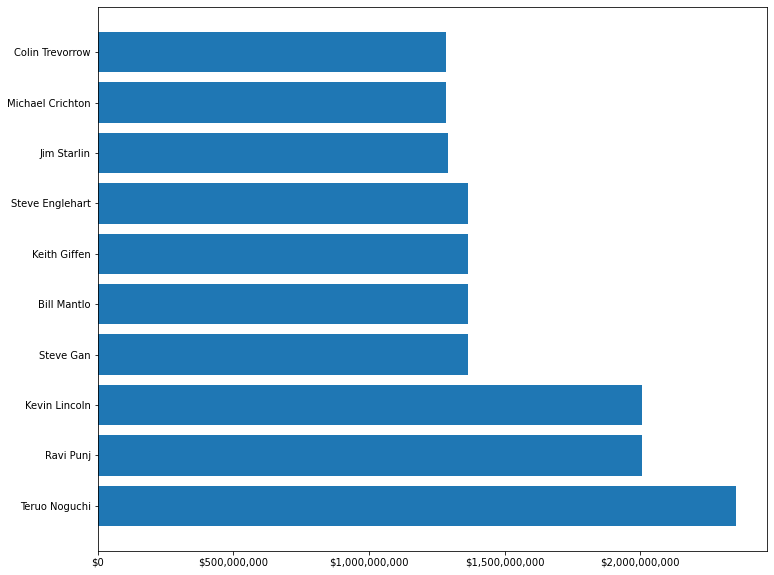

In [92]:
fig, ax = plt.subplots(figsize=(12,10))

ax.barh(pos_to_graph.index, pos_to_graph['budget_vs_gross'])
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}$'))

- wahoo, i think these are the top 10 writers who have had the most success in films.
- now to do the same with negative

In [80]:
temp_neg = writer_df.merge(
    net_negative, 
    left_on='movie_id',
    right_on = 'movie_id',
    how = 'left')

In [93]:
temp_neg = temp_neg.merge(
    person_df, 
    left_on='person_id',
    right_on = 'person_id',
    how = 'left')

In [94]:
#dropping rows without prod budget
temp_neg = temp_neg[(temp_neg['production_budget']!= 0) & (temp_neg['production_budget'].notnull() == True)]

In [95]:
temp_neg

,movie_id,person_id,Unnamed: 0,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross,primary_name,death_year
11,tt0999913,nm0527109,675.0,Straw Dogs,2011.0,110.0,"Action,Drama,Thriller",2011-09-16 00:00:00,Straw Dogs,25000000.0,10324441.0,11253821.0,strawdogs,-13746179.0,Rod Lurie,NaN
12,tt0999913,nm0329051,675.0,Straw Dogs,2011.0,110.0,"Action,Drama,Thriller",2011-09-16 00:00:00,Straw Dogs,25000000.0,10324441.0,11253821.0,strawdogs,-13746179.0,David Zelag Goodman,2011.0
13,tt0999913,nm0001603,675.0,Straw Dogs,2011.0,110.0,"Action,Drama,Thriller",2011-09-16 00:00:00,Straw Dogs,25000000.0,10324441.0,11253821.0,strawdogs,-13746179.0,Sam Peckinpah,1984.0
14,tt0999913,nm0930684,675.0,Straw Dogs,2011.0,110.0,"Action,Drama,Thriller",2011-09-16 00:00:00,Straw Dogs,25000000.0,10324441.0,11253821.0,strawdogs,-13746179.0,Gordon Williams,2017.0
62,tt1125929,nm0414893,5811.0,Love Ranch,2010.0,117.0,"Biography,Comedy,Drama",2010-06-30 00:00:00,Love Ranch,25000000.0,137885.0,146149.0,loveranch,-24853851.0,Mark Jacobson,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255695,tt8523050,nm9891776,136703.0,Othello,2014.0,NaN,Drama,1995-12-14 00:00:00,Othello,11000000.0,2844379.0,2844379.0,othello,-8155621.0,Ranjit Sharma,NaN
255735,tt8648232,nm7831362,137698.0,Aberdeen,2018.0,NaN,Drama,2001-08-17 00:00:00,Aberdeen,6500000.0,64148.0,64148.0,aberdeen,-6435852.0,Colton Van Til,NaN
255736,tt8648232,nm9946195,137698.0,Aberdeen,2018.0,NaN,Drama,2001-08-17 00:00:00,Aberdeen,6500000.0,64148.0,64148.0,aberdeen,-6435852.0,Taylor Weaver,NaN
255737,tt8648232,nm9946205,137698.0,Aberdeen,2018.0,NaN,Drama,2001-08-17 00:00:00,Aberdeen,6500000.0,64148.0,64148.0,aberdeen,-6435852.0,Edward Santiago,NaN


In [99]:
temp_neg.sort_values(by = 'budget_vs_gross', ascending = True)

,movie_id,person_id,Unnamed: 0,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross,primary_name,death_year
106250,tt6565702,nm0456158,113780.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",2019-06-07 00:00:00,Dark Phoenix,350000000.0,42762350.0,149762350.0,darkphoenix,-200237650.0,Jack Kirby,1994.0
106248,tt6565702,nm1079211,113780.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",2019-06-07 00:00:00,Dark Phoenix,350000000.0,42762350.0,149762350.0,darkphoenix,-200237650.0,Dave Cockrum,2006.0
106249,tt6565702,nm1334526,113780.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",2019-06-07 00:00:00,Dark Phoenix,350000000.0,42762350.0,149762350.0,darkphoenix,-200237650.0,Simon Kinberg,NaN
106251,tt6565702,nm0498278,113780.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",2019-06-07 00:00:00,Dark Phoenix,350000000.0,42762350.0,149762350.0,darkphoenix,-200237650.0,Stan Lee,2018.0
106247,tt6565702,nm1079208,113780.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",2019-06-07 00:00:00,Dark Phoenix,350000000.0,42762350.0,149762350.0,darkphoenix,-200237650.0,Chris Claremont,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,tt2107644,nm4766951,29539.0,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",2015-09-29 00:00:00,A Plague So Pleasant,1400.0,0.0,0.0,aplaguesopleasant,-1400.0,Benjamin Roberds,NaN
822,tt2107644,nm4766951,29539.0,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",2015-09-29 00:00:00,A Plague So Pleasant,1400.0,0.0,0.0,aplaguesopleasant,-1400.0,Benjamin Roberds,NaN
100220,tt4238858,nm2417783,75692.0,The Fits,2015.0,72.0,"Drama,Music",2016-06-03 00:00:00,The Fits,170000.0,166425.0,169242.0,thefits,-758.0,Lisa Kjerulff,NaN
100219,tt4238858,nm5516767,75692.0,The Fits,2015.0,72.0,"Drama,Music",2016-06-03 00:00:00,The Fits,170000.0,166425.0,169242.0,thefits,-758.0,Saela Davis,NaN


In [100]:
neg_to_graph = temp_neg.groupby('primary_name').mean().sort_values(by = 'budget_vs_gross', ascending = True).head(10)

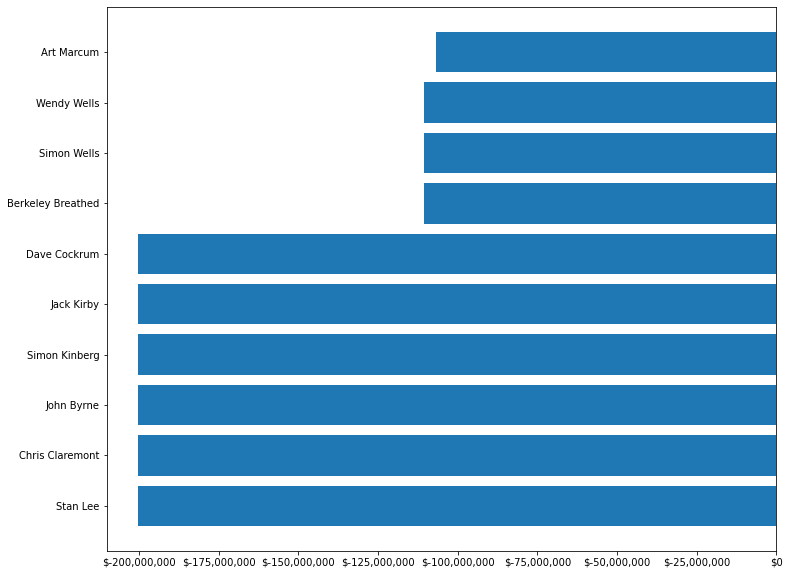

In [101]:
fig, ax = plt.subplots(figsize=(12,10))

ax.barh(neg_to_graph.index, neg_to_graph['budget_vs_gross'])
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

### CONCLUSION
- we have our top 3 writers to hire
- the bottom 10 seems wrong. Stan Lee shouldn't be there
    - or if anything, it shows that 'superhero' movies are an overall loss vs gain (based on stan lee's characters)

## DIRECTOR VS GROSS OR RATING (me)

In [102]:
q2 = """
SELECT *
FROM directors
;
"""
director_df = pd.read_sql(q2, conn)

In [103]:
director_df = director_df.merge(
    person_df, 
    left_on='person_id',
    right_on = 'person_id',
    how = 'left')

In [117]:
director_df

,movie_id,person_id,primary_name,death_year
0,tt0285252,nm0899854,Tony Vitale,NaN
1,tt0462036,nm1940585,Bill Haley,NaN
2,tt0835418,nm0151540,Jay Chandrasekhar,NaN
3,tt0835418,nm0151540,Jay Chandrasekhar,NaN
4,tt0878654,nm0089502,Albert Pyun,NaN
...,...,...,...,...
291169,tt8999974,nm10122357,Daysi Burbano,NaN
291170,tt9001390,nm6711477,Bernard Lessa,NaN
291171,tt9001494,nm10123242,Tate Nova,NaN
291172,tt9001494,nm10123248,Courtney Faye Powell,NaN


In [106]:
temp_pos_dir = director_df.merge(
    net_positive,
    left_on = 'movie_id',
    right_on = 'movie_id',
    how = 'left')

In [108]:
temp_neg_dir = director_df.merge(
    net_negative,
    left_on = 'movie_id',
    right_on = 'movie_id',
    how = 'left')

In [109]:
#dropping rows without prod budget
temp_pos_dir = temp_pos_dir[(temp_pos_dir['production_budget']!= 0) & (temp_pos_dir['production_budget'].notnull() == True)]

temp_neg_dir = temp_neg_dir[(temp_neg_dir['production_budget']!= 0) & (temp_neg_dir['production_budget'].notnull() == True)]

In [132]:
#for some reason there are many duplicates in movie - directors. These are to drop the duplicates
temp_pos_dir = temp_pos_dir.drop_duplicates(['movie_id', 'person_id'], keep = 'first')
temp_neg_dir = temp_neg_dir.drop_duplicates(['movie_id', 'person_id'], keep = 'first')

In [136]:
pos_to_graph_dir = temp_pos_dir.groupby('primary_name').mean().sort_values(by = 'budget_vs_gross', ascending = False).head(10)

In [140]:
neg_to_graph_dir = temp_neg_dir.groupby('primary_name').mean().sort_values(by = 'budget_vs_gross', ascending = True).head(10)

In [174]:
temp_pos_dir.groupby(['primary_name']).count()['movie_id']

primary_name
Aaron Agrasanchez    1
Aaron Schnobrich     1
Aaron Seltzer        1
Aash Aaron           1
Abby Kohn            1
                    ..
Zhijian Tong         1
Zsófia Szilágyi      1
Zuri Rinpoche        2
Éric Tessier         1
Ömür Atay            1
Name: movie_id, Length: 1913, dtype: int64

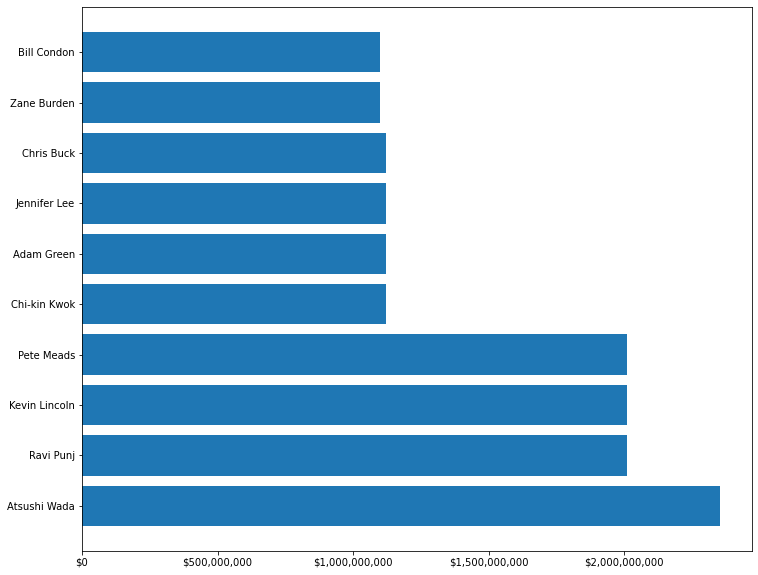

In [142]:
fig, ax = plt.subplots(figsize=(12,10))

ax.barh(pos_to_graph_dir.index, pos_to_graph_dir['budget_vs_gross'])
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

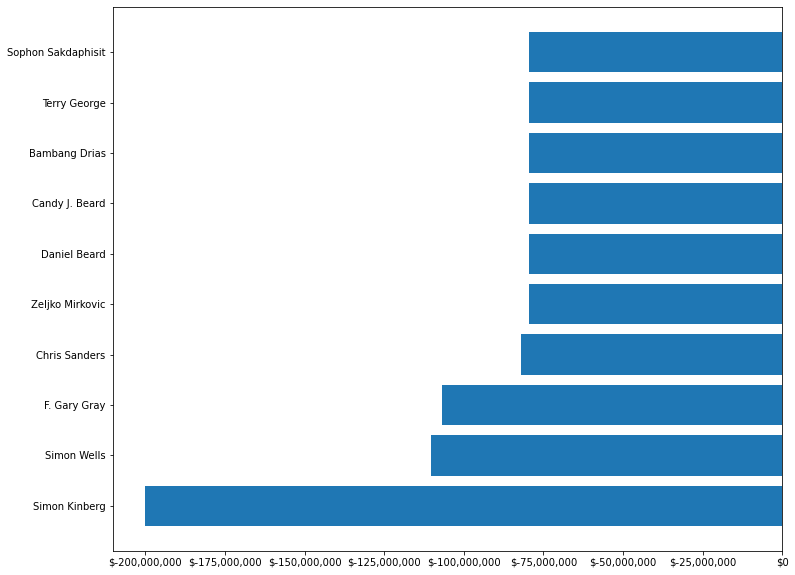

In [141]:
fig, ax = plt.subplots(figsize=(12,10))

ax.barh(neg_to_graph_dir.index, neg_to_graph_dir['budget_vs_gross'])
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

In [178]:
temp_pos_dir[temp_pos_dir['movie'] == 'Avatar']

,movie_id,person_id,primary_name,death_year,Unnamed: 0,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
126895,tt1775309,nm3786927,Atsushi Wada,NaN,17740.0,Avatar,2011.0,93.0,Horror,2009-12-18 00:00:00,Avatar,425000000.0,760507625.0,2.776345e+09,avatar,2.351345e+09


In [135]:
temp_pos_dir

,movie_id,person_id,primary_name,death_year,Unnamed: 0,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
71,tt1126618,nm0585011,Roger Michell,NaN,5818.0,Morning Glory,2010.0,107.0,"Comedy,Drama,Romance",2010-11-10 00:00:00,Morning Glory,40000000.0,31011732.0,59795070.0,morningglory,19795070.0
142,tt1411704,nm0384722,Tim Hill,NaN,7755.0,Hop,2011.0,95.0,"Adventure,Animation,Comedy",2011-04-01 00:00:00,Hop,63000000.0,108085305.0,188657593.0,hop,125657593.0
173,tt1564585,nm0833780,Greg Strause,NaN,10063.0,Skyline,2010.0,92.0,"Action,Sci-Fi,Thriller",2010-11-12 00:00:00,Skyline,10000000.0,21416355.0,68264973.0,skyline,58264973.0
174,tt1564585,nm0833779,Colin Strause,NaN,10063.0,Skyline,2010.0,92.0,"Action,Sci-Fi,Thriller",2010-11-12 00:00:00,Skyline,10000000.0,21416355.0,68264973.0,skyline,58264973.0
185,tt1573072,nm1349318,Sajid Khan,NaN,10280.0,Housefull,2010.0,144.0,Comedy,2010-04-30 00:00:00,Housefull,10100000.0,1183658.0,18726300.0,housefull,8626300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290118,tt6335394,nm8526367,Adam Weingrod,NaN,109640.0,The Island,2017.0,60.0,"Documentary,Drama",2005-07-22 00:00:00,The Island,120000000.0,35818913.0,163018913.0,theisland,43018913.0
290481,tt7368554,nm0838499,Martin Sulík,NaN,123639.0,The Interpreter,2018.0,113.0,"Comedy,Drama",2005-04-22 00:00:00,The Interpreter,90000000.0,72708161.0,162753837.0,theinterpreter,72753837.0
290566,tt7496196,nm6972547,Wojciech Klimala,NaN,125198.0,Hugo,2017.0,80.0,Documentary,2011-11-23 00:00:00,Hugo,180000000.0,73864507.0,180047784.0,hugo,47784.0
290718,tt7634968,nm0788202,Adam Shankman,NaN,127036.0,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0,whatmenwant,49911903.0


In [104]:
director_df

,movie_id,person_id,primary_name,death_year
0,tt0285252,nm0899854,Tony Vitale,NaN
1,tt0462036,nm1940585,Bill Haley,NaN
2,tt0835418,nm0151540,Jay Chandrasekhar,NaN
3,tt0835418,nm0151540,Jay Chandrasekhar,NaN
4,tt0878654,nm0089502,Albert Pyun,NaN
...,...,...,...,...
291169,tt8999974,nm10122357,Daysi Burbano,NaN
291170,tt9001390,nm6711477,Bernard Lessa,NaN
291171,tt9001494,nm10123242,Tate Nova,NaN
291172,tt9001494,nm10123248,Courtney Faye Powell,NaN


## RATED (R, M, PG, PG13) vs RATING (Popularity) (Jonny)

## RUNTIME VS GROSS/RATING (LOOK BY GENRE) (Jonny)

## RATING(pg,13, R) VS GROSS	(Jonny)